># ***Problem Statement***

*The problem addressed by this model is finding out if the patient is medically adherent or not. Clinical studies have demonstrated that only 50-70% of patients adhere properly to prescribed drug therapy. This behavior of adherence failure can cause health issues, hospitalization risk and even death. Patient Adherence insights can prove useful for*

 1. *Doctors who prescribe drugs*
 2. *Drug / Medication producers*
 3. *Government*

*This model is focused on the prediction of adherence behavior with individual selection. The dataset utilized is historically captured through a medication event monitoring system. When the group who are prone to be non-adherent is accurately identified and targeted, it makes the way for improving patient care and helps Healthcare workers to assess and develop new strategies.*

 ***The potential outcomes:***
  1. *Patient adherence rate*
  2. *Reasons for non-adherence*
  3. *Potential non-adherence*


># ***Importing all the required Libraries***

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

># ***Importing our dataset into the program***

In [3]:
df = pd.read_csv(r'C:\Users\tanus\Desktop\patient_adherence\Dataset\patient_data.csv')

df.head()

,Patient_ID,Age,Gender,Marital_Status,Financial_Status,Insurance,Drug_Cost,Prescription_Period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Adherence
0,PAT001,19,Male,Unmarried,Poor,Yes,High,7,0,0,0,0,0,No
1,PAT002,24,Female,Unmarried,Poor,No,High,59,0,0,0,0,0,No
2,PAT003,4,Female,Married,Poor,Yes,High,43,0,0,0,0,0,No
3,PAT004,38,Male,Unmarried,Poor,No,Low,66,0,0,0,0,0,No
4,PAT005,46,Female,Married,Poor,No,Low,98,0,0,0,0,0,No


># ***Visualising the imported dataset***

No     125822
Yes     54390
Name: Adherence, dtype: int64

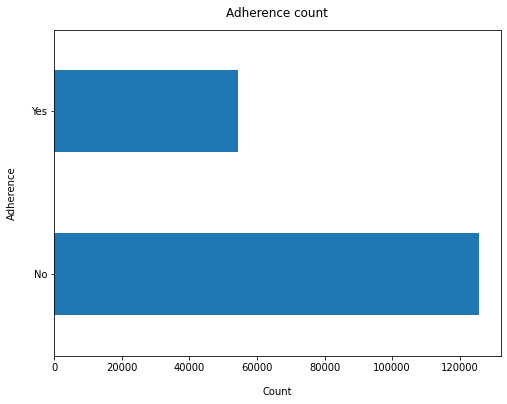

In [4]:
df['Adherence'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Adherence", labelpad=14)
plt.title("Adherence count", y=1.02);

df['Adherence'].value_counts()

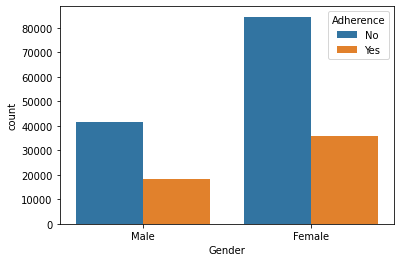

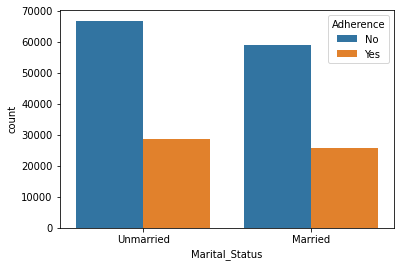

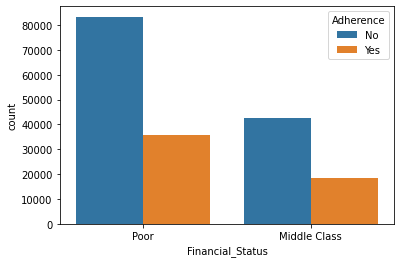

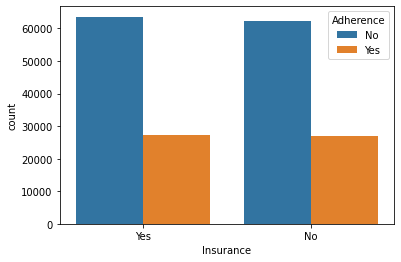

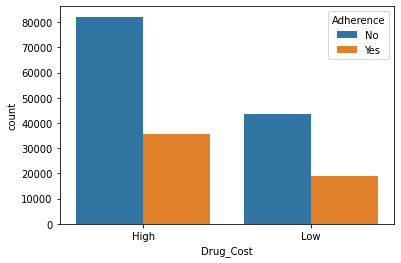

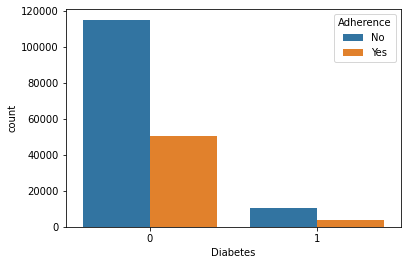

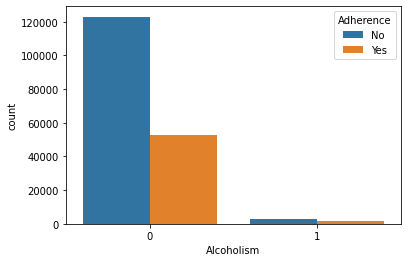

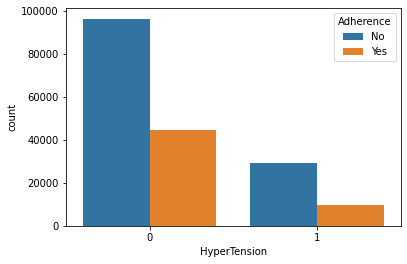

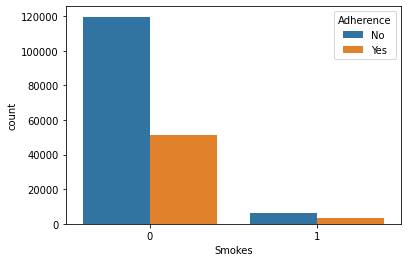

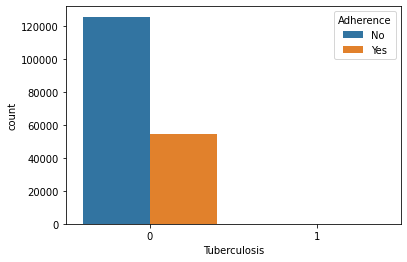

In [5]:

for i, predictor in enumerate(df.drop(columns=['Adherence', 'Patient_ID', 'Prescription_Period', 'Age'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Adherence')

Text(0.5, 1.0, 'Adherence by prescription period')

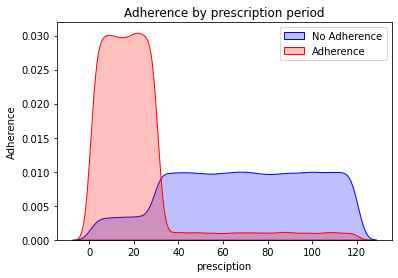

In [6]:
plot = sns.kdeplot(df.Prescription_Period[(df["Adherence"] == "No") ],
                color="Blue", shade = True)
plot = sns.kdeplot(df.Prescription_Period[(df["Adherence"] == "Yes") ],
                ax =plot, color="Red", shade= True)
plot.legend(["No Adherence","Adherence"],loc='upper right')
plot.set_ylabel('Adherence')
plot.set_xlabel('presciption period')
plot.set_title('Adherence by prescription period')

Text(0.5, 1.0, 'Age by Adherence')

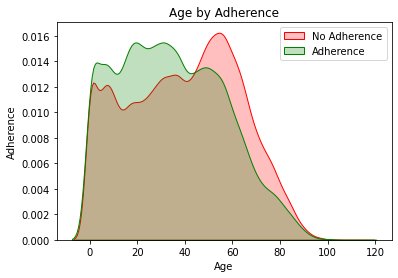

In [7]:
plot = sns.kdeplot(df.Age[(df["Adherence"] == "No") ],
                color="Red", shade = True)
plot = sns.kdeplot(df.Age[(df["Adherence"] == "Yes") ],
                ax =plot, color="Green", shade= True)
plot.legend(["No Adherence","Adherence"],loc='upper right')
plot.set_ylabel('Adherence')
plot.set_xlabel('Age')
plot.set_title('Age by Adherence')

># ***Conclusion***

 1. *We can clearly see from the visuals that patients doesn't adhere their medication if the prescription days are above 30 days.*
 2. *14 to 30 is most likely to adhere to the medication when compared to older patients.*

*These are the conclusions that we got from analyzing the data by doing EDA(**Exploratory Data Analaysis**).*

># ***Missing Data Identification***

>> *Our dataset doesn't have any missing data in it, so we can just proceed to next step.*

># ***Data Cleaning***

In [8]:

gender = pd.get_dummies(data=df.Gender)
marital_status = pd.get_dummies(data=df.Marital_Status)
financial_status = pd.get_dummies(data=df.Financial_Status)
insurance = pd.get_dummies(data=df.Insurance)
drug_cost = pd.get_dummies(data=df.Drug_Cost)

df = pd.concat([df, gender, marital_status, financial_status, insurance, drug_cost], axis='columns')
df = df.drop(['Gender', 'Marital_Status', 'Financial_Status', 'Insurance', 'Drug_Cost', 'No'], axis='columns')
df.rename(columns = {'Yes' : 'Insurance'}, inplace = 'True')

le = LabelEncoder()

df['Adherence'] = le.fit_transform(df['Adherence'])
df.head(100)

,Patient_ID,Age,Prescription_Period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Adherence,Female,Male,Married,Unmarried,Middle Class,Poor,Insurance,High,Low
0,PAT001,19,7,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0
1,PAT002,24,59,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,PAT003,4,43,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0
3,PAT004,38,66,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
4,PAT005,46,98,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,PAT096,63,101,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1
96,PAT097,28,41,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1
97,PAT098,52,32,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
98,PAT099,30,12,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0


># ***Exporting our processed data***

In [10]:
df.to_csv('../Dataset/patient_data_processed.csv')
print('Have a great time building your model! :)')

Have great time building your model! :)
